In [1]:
import gym
import numpy as np
env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


## Sample CartPole 

In [2]:
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


### Observations
Environment's step function returns 4 values

 * observation(object): environment specific object giving you a representating your observation of the environment. Like a snapshot of curent state of the game
 
 * reward(float): amount of reward achieved by the previous action
 
 * done(boolean): if done is True then its like game-over situation
 
 * info(dictionary): for debugging purposes
 
Others

 * reset(): the process gets started by this calling this function it                       returns the initial observation
 

## Simple RL to learn to balance cartpole

### Run Episode function 

In [3]:
def run_episode(env, parameters):
    observation = env.reset()
    totalReward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        env.render()
        totalReward += reward
        if done:
            break
    return totalReward

### Random Search Method
just randomly initilize weights and pick the one that which it performs the best as cartpole is simple with only 4 observations this works

In [1]:
bestParams = None
bestReward = 0
for _ in range(10000):
    parameters = np.random.rand(4) * 2 - 1 
    reward = run_episode(env,parameters)
    if reward > bestReward:
        bestReward = reward
        bestParams = parameters
        if reward == 200: #considering if agent lasts 200 steps as job done
            break

NameError: name 'np' is not defined

### Hill-Climbing 
* As the name suggests we shall follow hill climbing algorithm , we start with a randomly initilized weight , every episode we shall add noise and keep the updated weight if the agent imporves.
* idea is to gradully improve the weights , rather than just fiddle with weights, but if noise scaling factor is high in comparision to the current weights this is like random search
* if the optimal range of weights is small then hill climbing will move closer to it with every iteration while random search take long time jumping around it
* Also cons of this method is that if the initilized weights are bad adding noiose to it wont help
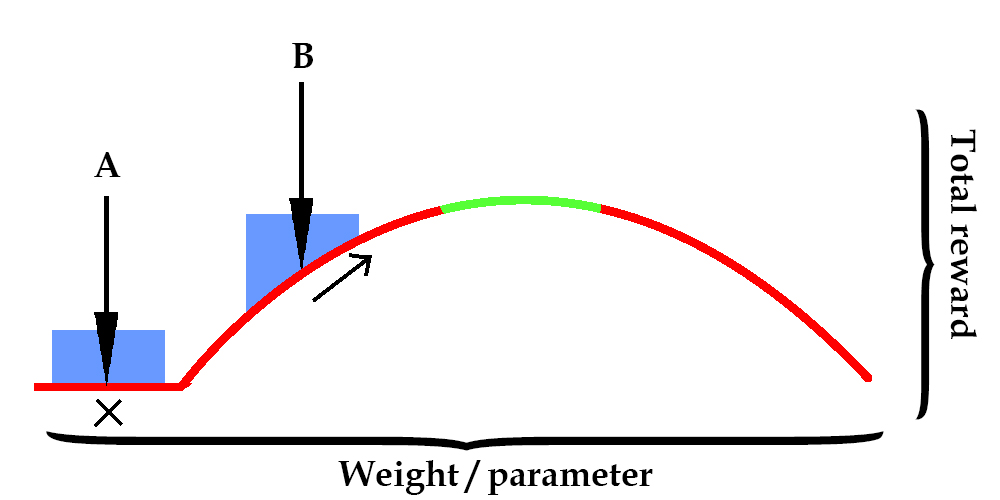

* blue space is the noise if its initilized at a itll get stuck there but ininitlized with B will get to the green zone
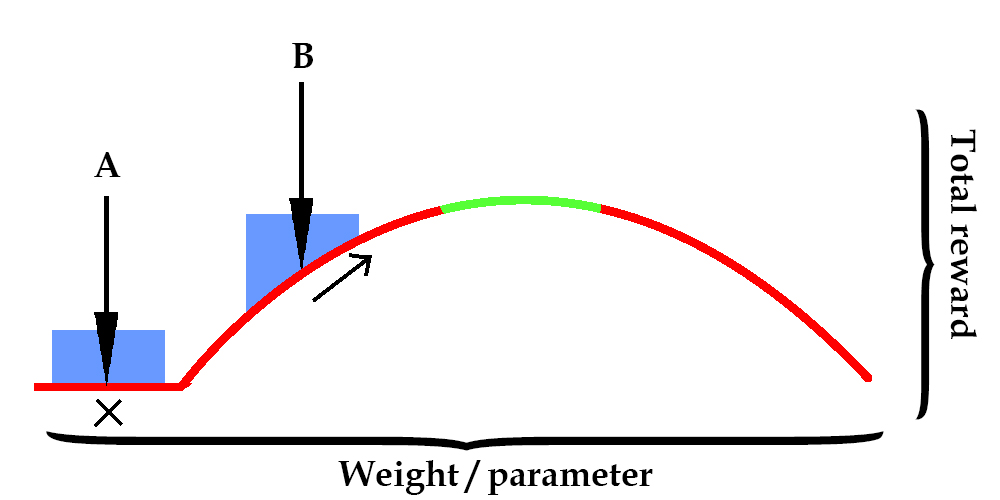

In [ ]:
noise_scaling = 0.1  
parameters = np.random.rand(4) * 2 - 1  
bestreward = 0  
for _ in range(10000):  
    newparams = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
    reward = 0
    run = run_episode(env,newparams)
    if reward > bestreward:
        bestreward = reward
        parameters = newparams
        if reward == 200:
            break